In [124]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import csv

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gala_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Предлагаю вам для проверки эту часть кода не запускать, а загрузить сразу файл clean_reviews. Закомментированная ячейка будет ниже.

In [60]:
df = pd.read_csv('Books_rating.csv')
df.head() 

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [62]:
reviews = df.sample (n = 10000)
reviews

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
347258,B000KISQC6,"Guns, Germs, and Steel: The Fates of Human Soc...",NaN,A3H2CKTFZ3B3GD,Brian Hawkinson,1/1,5.0,1339977600,A fascinating must read for non-fiction fans...,I've had this one on the shelf sine 2002. Not ...
1349237,B000FQ4J0Q,The Irresistible Offer: How to Sell Your Produ...,4.39,A155NRXWNVTY55,"Jimmy Vee ""'www.GravitationalMarketing.com""",6/9,4.0,1129248000,First Half Is Excellent,I enjoyed the first 100 pages of this book a l...
40037,055321800X,KEVIN'S STORY # 165 (Loveswept),NaN,A3ATKR9MOTW5VY,DevoGirl,2/3,1.0,1239667200,Just Awful,"I enjoy a good romance, and am willing to put ..."
158835,0681994851,Jane Eyre,NaN,NaN,NaN,2/2,4.0,1074297600,A good book,I thought this was a nice book. The main chara...
2681868,0060001534,Diary of a Spider,12.40,A13G1TKIKHGV3F,M. Heiss,0/0,5.0,1295568000,How did we miss these?,"When the kids were little, we read the covers ..."
...,...,...,...,...,...,...,...,...,...,...
2092438,1582790337,Wuthering Heights,NaN,A2LI5JHFY9FHJE,"MeSha ""Mesha""",0/5,2.0,1325894400,Depressing,"Sadly, I couldn't even finish it. It is well w..."
775532,B000OYQFIS,Jonathan Livingston Seagull: A Story,NaN,NaN,NaN,0/0,5.0,991958400,THE MOST BEAUTIFUL BOOK EVER WRITTEN!,"Of all the countless, thousands of books I hav..."
442214,B000NV8GTI,Franny and Zooey,NaN,A1NLX2SJ3LW4PM,"L. Parker ""Life's too short to read bad books""",11/28,1.0,1193875200,This book helped me realize something important,I hated this book. I hatedThe Catcher in the R...
443642,B000JG9E0M,The Hollow Tree,NaN,AA7W0CFRXF46L,elfdart,0/0,5.0,1251936000,great,"i really enjoyed this book when i was younger,..."


In [63]:
reviews.drop(columns = ['Price', 'review/helpfulness', 'review/score', 'review/time'],axis = 1, inplace=True)
reviews

,Id,Title,User_id,profileName,review/summary,review/text
347258,B000KISQC6,"Guns, Germs, and Steel: The Fates of Human Soc...",A3H2CKTFZ3B3GD,Brian Hawkinson,A fascinating must read for non-fiction fans...,I've had this one on the shelf sine 2002. Not ...
1349237,B000FQ4J0Q,The Irresistible Offer: How to Sell Your Produ...,A155NRXWNVTY55,"Jimmy Vee ""'www.GravitationalMarketing.com""",First Half Is Excellent,I enjoyed the first 100 pages of this book a l...
40037,055321800X,KEVIN'S STORY # 165 (Loveswept),A3ATKR9MOTW5VY,DevoGirl,Just Awful,"I enjoy a good romance, and am willing to put ..."
158835,0681994851,Jane Eyre,NaN,NaN,A good book,I thought this was a nice book. The main chara...
2681868,0060001534,Diary of a Spider,A13G1TKIKHGV3F,M. Heiss,How did we miss these?,"When the kids were little, we read the covers ..."
...,...,...,...,...,...,...
2092438,1582790337,Wuthering Heights,A2LI5JHFY9FHJE,"MeSha ""Mesha""",Depressing,"Sadly, I couldn't even finish it. It is well w..."
775532,B000OYQFIS,Jonathan Livingston Seagull: A Story,NaN,NaN,THE MOST BEAUTIFUL BOOK EVER WRITTEN!,"Of all the countless, thousands of books I hav..."
442214,B000NV8GTI,Franny and Zooey,A1NLX2SJ3LW4PM,"L. Parker ""Life's too short to read bad books""",This book helped me realize something important,I hated this book. I hatedThe Catcher in the R...
443642,B000JG9E0M,The Hollow Tree,AA7W0CFRXF46L,elfdart,great,"i really enjoyed this book when i was younger,..."


Так как найденный мной файл весит очень много и работать с ним сложно (особенно с учетом перспектив ручной разметки данных), я планирую использовать далее выборку из 10 000 строк. Также удалила некоторые стообцы, которые для нас сейчас интереса не представляют. В том числе удалила оценку, оставила только текст отзыва, чтобы далее разметить его как положительный, отрицательный или нейтральный. Этот очищенный датафрейм сохраняю в csv, чтобы не пытаться каким-то образом отправлять вам csv на 2.8 Гб. 

In [64]:
reviews.to_csv('clean_reviews.csv')

In [65]:
# Ячейка для загрузки датафрейма с которым далее буду работать
# reviews = pd.read_csv('clean_reviews.csv')

In [84]:
# Формирую выборки для выполнения разметки данных на основе правил и вручную

reviews_for_RB = reviews.sample (frac = 0.25)
reviews_for_manual = reviews.sample (n = 50)

In [67]:
reviews_for_RB.to_csv('reviews_for_RB.csv')
reviews_for_manual.to_csv('reviews_for_manual.csv')

In [68]:
# Вместе со словарем синонимов подобрала некоторые слова, которые явно указывают, что отзыв позитивный, негативный или нейтральный.
positive_words = ['like', 'liked', 'happy', 'excited', 'good', 'great', 'favourite', 'awesome', 'astonishing', 'breathtaking', 
                  'fantastic', 'incredible', 'marvelous', 'outrageous', 'phenomenal', 'remarkable', 
                  'admirable','amazing', 'astonishing', 'awesome', 'brilliant', 'cool', 'enjoyable', 'excellent', 
                  'fabulous', 'fantastic', 'magnificent', 'outstanding', 'pleasing', 'sensational', 'superb', 'wonderful']
negative_words = ['bored', 'boring', 'tiresome', 'tired', 'dislike', 'hate', 'disappointed', 'frustrated', 'terrible' 'bad', 'awful','cheap', 'dreadful', 'inferior', 
                  'lousy','poor', 'appalling', 'depressing', 'dire', 'disgusting', 
                  'distressing', 'dreadful', 'frightful', 'ghastly', 'gruesome', 'harrowing', 'hideous', 'horrendous', 'horrible', 
                  'horrific', 'horrifying', 'nasty', 'tough', 'ugly', 'unpleasant'] 
neutral_words = ['normal', 'ordinary', 'plain', 'regular', 'usual', 'mediocre', 'so-so', 'ok', 'okay']

In [69]:
# Несколько переписала код, чтобы мы могли учитывать и явно нейтральные слова в отзыве
def get_sentiment(text):
    # Токенизация текста на отдельные слова
    words = nltk.word_tokenize(text.lower())
    # Подсчет количества положительных и отрицательных слов
    num_positive = sum([1 for word in words if word in positive_words])
    num_negative = sum([1 for word in words if word in negative_words])
    num_neutral = sum([1 for word in words if word in neutral_words])
    # Присвоение метки на основе чистой оценки настроения
    if num_positive > num_negative or num_positive > num_neutral:
        return 'positive'
    elif num_negative > num_positive or num_negative > num_neutral:
        return 'negative'
    else:
        return 'neutral'

In [70]:
text1 = "It is a wonderful book"
text2 = "Awful book"
text3 = "Quite a medioce book. So-so"
print(get_sentiment(text1))
print(get_sentiment(text2))
print(get_sentiment(text3))

positive
negative
neutral


In [71]:
from textblob import TextBlob

In [85]:
def get_sentiment(reviews_for_RB):
    blob = TextBlob(reviews_for_RB)
    return blob.sentiment.polarity

In [86]:
# Применение функции к столбцу 'text' датасета для получения полярности настроения каждого твита
reviews_for_RB['sentiment'] = reviews_for_RB['review/text'].apply(get_sentiment)

In [87]:
reviews_for_RB.head()

,Id,Title,User_id,profileName,review/summary,review/text,sentiment
1044825,B000GROPF8,"Animal Farm (Signet Classics, CT304)",A1K1VFIJBGPVN,Katherine S. Adamic,In Good Shape,The book I bought and recieved in a timely man...,1.000000
501141,0736686851,Portrait of a Killer: Jack the Ripper - Case C...,A265CL5S3XTVT7,Cris,Not too bad!,I read the other reviews before writing mine. ...,0.214198
1826545,B000JDB1WE,Mara Daughter Of The Nile,A2M6I1S8PF0Z3O,Floridian,Suspense in Ancient Egypt,This book is the story of an Egyptian slave gi...,0.135417
2089072,0911104674,Never Eat Anything Bigger Than Your Head & Oth...,ATGLBGHMHELST,Allison L. Zuber,Love Kliban,I love the B Kliban series. Didn't think i wou...,0.650000
2133996,155832304X,The Nursing Mother's Companion: Revised Edition,A3D031KD2MMLM8,soon-to-be-mom,Used w/both children,Nursed my first for 1 year and am still nursin...,0.024306


In [88]:
def get_sentiment_label(score):
    if score > 0.2:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [89]:
reviews_for_RB['sentiment_label'] = reviews_for_RB['sentiment'].apply(get_sentiment_label)

In [90]:
view = reviews_for_RB.sample(n=5)
view

,Id,Title,User_id,profileName,review/summary,review/text,sentiment,sentiment_label
682644,B000NOVJXA,Journey to the End of the Night,A26PU0WOKGHN5A,"Cyrus Emerson ""A Reader""",Journey to the End of the Night,Louis-Ferdinand C&eacute;line delivers as a co...,0.180957,neutral
2497634,0007182228,Motorcycle Diaries,A3HBLG6CUF4VQL,"rickjames8 ""rickjames8""",Not an interesting read,I more or less stumbled upon this book looking...,0.238492,positive
418556,0848714962,The Jenny Craig Cookbook: Cutting Through the Fat,A30H2335OM7RD6,"apoem ""apoem""",Low Fat Cooking Should Not Be so Hard,There were a wide variety of recipes in this b...,0.240000,positive
403267,071192483X,Sid's Way: The Life and Death of Sid Vicious,NaN,NaN,Quite a moving portrayal,In my opinion this book captured Sid's persona...,0.323333,positive
650319,093584886X,Tailgate Party Cookbook,NaN,NaN,Variety &amp; Delicious,This cookbook offers everything from beverages...,0.300000,positive


In [91]:
reviews_for_RB.drop('sentiment', axis = 1, inplace=True)

,Id,Title,User_id,profileName,review/summary,review/text,sentiment_label
1044825,B000GROPF8,"Animal Farm (Signet Classics, CT304)",A1K1VFIJBGPVN,Katherine S. Adamic,In Good Shape,The book I bought and recieved in a timely man...,positive
501141,0736686851,Portrait of a Killer: Jack the Ripper - Case C...,A265CL5S3XTVT7,Cris,Not too bad!,I read the other reviews before writing mine. ...,positive
1826545,B000JDB1WE,Mara Daughter Of The Nile,A2M6I1S8PF0Z3O,Floridian,Suspense in Ancient Egypt,This book is the story of an Egyptian slave gi...,neutral
2089072,0911104674,Never Eat Anything Bigger Than Your Head & Oth...,ATGLBGHMHELST,Allison L. Zuber,Love Kliban,I love the B Kliban series. Didn't think i wou...,positive
2133996,155832304X,The Nursing Mother's Companion: Revised Edition,A3D031KD2MMLM8,soon-to-be-mom,Used w/both children,Nursed my first for 1 year and am still nursin...,neutral
...,...,...,...,...,...,...,...
396686,B000H7PY7A,Voyage from Yesteryear,A3DUTJY98LZ97G,robert shaffer,Thought provoking,Thought provoking look at what would happen in...,neutral
2246446,0345395093,"Planetfall (Genellan, Bk. 1)",NaN,NaN,Just Okay,This is an action packed book with lots of ali...,negative
315975,1567312977,Power of Focusing,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",Becoming More Aware,"""With focusing, we learn how to welcome, ackno...",neutral
2124391,B00086AOBG,"Switzerland,",AMMT7AF96IBWL,Susan D Young,Not my cup of tea,I guess I thought this would be a travelogue b...,positive


In [92]:
reviews_for_RB.rename(columns={'sentiment_label': 'sentiment'}, inplace=True)
reviews_for_RB.head()

,Id,Title,User_id,profileName,review/summary,review/text,sentiment
1044825,B000GROPF8,"Animal Farm (Signet Classics, CT304)",A1K1VFIJBGPVN,Katherine S. Adamic,In Good Shape,The book I bought and recieved in a timely man...,positive
501141,0736686851,Portrait of a Killer: Jack the Ripper - Case C...,A265CL5S3XTVT7,Cris,Not too bad!,I read the other reviews before writing mine. ...,positive
1826545,B000JDB1WE,Mara Daughter Of The Nile,A2M6I1S8PF0Z3O,Floridian,Suspense in Ancient Egypt,This book is the story of an Egyptian slave gi...,neutral
2089072,0911104674,Never Eat Anything Bigger Than Your Head & Oth...,ATGLBGHMHELST,Allison L. Zuber,Love Kliban,I love the B Kliban series. Didn't think i wou...,positive
2133996,155832304X,The Nursing Mother's Companion: Revised Edition,A3D031KD2MMLM8,soon-to-be-mom,Used w/both children,Nursed my first for 1 year and am still nursin...,neutral
...,...,...,...,...,...,...,...
396686,B000H7PY7A,Voyage from Yesteryear,A3DUTJY98LZ97G,robert shaffer,Thought provoking,Thought provoking look at what would happen in...,neutral
2246446,0345395093,"Planetfall (Genellan, Bk. 1)",NaN,NaN,Just Okay,This is an action packed book with lots of ali...,negative
315975,1567312977,Power of Focusing,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",Becoming More Aware,"""With focusing, we learn how to welcome, ackno...",neutral
2124391,B00086AOBG,"Switzerland,",AMMT7AF96IBWL,Susan D Young,Not my cup of tea,I guess I thought this would be a travelogue b...,positive


<Axes: >

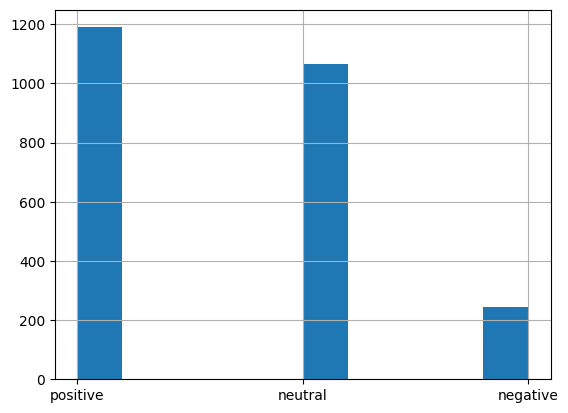

In [93]:
reviews_for_RB['sentiment'].hist()

Как видно, наши данные разметились на основе правил. Большинство отзывов положительные либо нейтральные, веротяно, люди хотят написать отзыв на книгу, когда она нравится, а когда не нравится - не хотят ее дочитывать. Проблема, кончено, в том, что крайне сложно угадать все возможные слова, которые использовали пользователи при написании отзывов. Далее выполняю разметку вручную в label studio.

In [128]:
labelled_reviews_for_manual = pd.read_csv('labelled_reviews_for_manual.csv', engine='python')

In [129]:
labelled_reviews_for_manual.head()

,Id,Title,Unnamed: 0,User_id,annotation_id,annotator,created_at,id,lead_time,profileName,review/summary,review/text,sentiment,updated_at
0,B000CD1GBW,The Case of the Howling Dog,1812013,NaN,1,1,2024-04-24T14:34:51.996067Z,1,6.022,NaN,you never suspected it,a client calls for a will and a howling dog . ...,positive,2024-04-24T14:34:51.996067Z
1,0553574558,To Play the Fool,2170002,A18T1XS1EZ6F17,2,1,2024-04-24T14:35:05.892350Z,2,20.396,"Sarah Cole ""Prometheus Lass""",Place and Character,"Laurie R. King's knowledge of California, reli...",positive,2024-04-24T14:35:05.892350Z
2,0451125819,We the Living,544438,A3MO0FRMP26SJV,3,1,2024-04-24T14:35:24.268443Z,3,15.429,"M. S. Ulbricht ""BomboMon""",The First and most lyrical work by a Wonderful...,Ms. Rand states in the foreward of her debut n...,positive,2024-04-24T14:35:24.268443Z
3,B000HTC7YG,Of Mice and Men,2505154,NaN,4,1,2024-04-24T14:35:29.250194Z,4,2.418,NaN,One of the best books ever written,This book is probably the best book that I hav...,positive,2024-04-24T14:35:29.250194Z
4,188628413X,For All Our Daughters: Five Essentials to Help...,1331901,NaN,5,1,2024-04-24T14:36:24.153972Z,5,5.864,NaN,Heard her speak and love her book,I had the oppourtunity to hear Pegine speak on...,positive,2024-04-24T14:36:24.153972Z


In [130]:
# Чтобы таблицы с размеченными данными были в одном формате, удалю столбцы, которые добавились в Label studio
labelled_reviews_for_manual.drop(columns = ['Unnamed: 0', 'annotation_id', 'annotator', 'created_at', 'id', 'lead_time', 'updated_at'],axis = 1, inplace=True)

In [131]:
labelled_reviews_for_manual.head(5)

,Id,Title,User_id,profileName,review/summary,review/text,sentiment
0,B000CD1GBW,The Case of the Howling Dog,NaN,NaN,you never suspected it,a client calls for a will and a howling dog . ...,positive
1,0553574558,To Play the Fool,A18T1XS1EZ6F17,"Sarah Cole ""Prometheus Lass""",Place and Character,"Laurie R. King's knowledge of California, reli...",positive
2,0451125819,We the Living,A3MO0FRMP26SJV,"M. S. Ulbricht ""BomboMon""",The First and most lyrical work by a Wonderful...,Ms. Rand states in the foreward of her debut n...,positive
3,B000HTC7YG,Of Mice and Men,NaN,NaN,One of the best books ever written,This book is probably the best book that I hav...,positive
4,188628413X,For All Our Daughters: Five Essentials to Help...,NaN,NaN,Heard her speak and love her book,I had the oppourtunity to hear Pegine speak on...,positive


In [132]:
labeled_reviews = pd.concat([labelled_reviews_for_manual, reviews_for_RB])

In [192]:
labeled_reviews.to_csv('labeled_reviews.csv')

In [133]:
labeled_reviews

,Id,Title,User_id,profileName,review/summary,review/text,sentiment
0,B000CD1GBW,The Case of the Howling Dog,NaN,NaN,you never suspected it,a client calls for a will and a howling dog . ...,positive
1,0553574558,To Play the Fool,A18T1XS1EZ6F17,"Sarah Cole ""Prometheus Lass""",Place and Character,"Laurie R. King's knowledge of California, reli...",positive
2,0451125819,We the Living,A3MO0FRMP26SJV,"M. S. Ulbricht ""BomboMon""",The First and most lyrical work by a Wonderful...,Ms. Rand states in the foreward of her debut n...,positive
3,B000HTC7YG,Of Mice and Men,NaN,NaN,One of the best books ever written,This book is probably the best book that I hav...,positive
4,188628413X,For All Our Daughters: Five Essentials to Help...,NaN,NaN,Heard her speak and love her book,I had the oppourtunity to hear Pegine speak on...,positive
...,...,...,...,...,...,...,...
396686,B000H7PY7A,Voyage from Yesteryear,A3DUTJY98LZ97G,robert shaffer,Thought provoking,Thought provoking look at what would happen in...,neutral
2246446,0345395093,"Planetfall (Genellan, Bk. 1)",NaN,NaN,Just Okay,This is an action packed book with lots of ali...,negative
315975,1567312977,Power of Focusing,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",Becoming More Aware,"""With focusing, we learn how to welcome, ackno...",neutral
2124391,B00086AOBG,"Switzerland,",AMMT7AF96IBWL,Susan D Young,Not my cup of tea,I guess I thought this would be a travelogue b...,positive


Я объединила две размеченные выборки в один датафрейм для последующего обучения модели

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [135]:
labeled_reviews = shuffle(labeled_reviews)

In [186]:
train, test = train_test_split(labeled_reviews, test_size=0.3, random_state=42)


In [190]:
def train_model(train):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(train['review/text'])
    y = train['sentiment']

    model = LogisticRegression()
    model.fit(X, y)
    return model, vectorizer

In [191]:
# Обучаю модель логистической регрессии на выборке для обучения
model, vectorizer = train_model(train)

Теперь проверим эффективность модели на выборке для тестирования 

In [188]:
X_test = vectorizer.transform(test['review/text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(test['sentiment'], y_test_predicted, average = 'micro')

print(f1)

0.6849673202614379


Мы получили результат 68%
Такой результат считается приемлемым, однако по моему мнению его можно в перспективе улучшить. Полагаю, для достижения лучшего результата было бы хорошо, во-первых, взять больше данных и разметить их точнее (в том числе использовать больше ручной разметки, так как отзывы - вещь коварная и слова в контексте могут значить прямо противоположное). К сожалению, мои ресурсы как по ручной разметке, так и по мощности ПК весьма ограничены.